# gantt charts

This section describes various options available for gantt charts in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/gantt.html#gantt

.. warning:: Gantt charts are only currently available when using the `mpl` plotting engine

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path
import datetime

Optionally set the design theme (skipping here and using default):

In [2]:
fcp.set_theme('gray')
# fcp.set_theme('white')

Previous theme file found! Renaming to "defaults_old.py" and copying theme "gray"...done!


## Basic chart

The simplest Gantt chart available in **fivecentplots** is essentially a horizontal bar chart in which each row represents a task and the bar length represents a data range.  Gantt charts support all **fivecentplots** grouping options to enable deeper insight into work tasks.

The following arguments are required to generate a Gantt chart:

* `df`: a `pandas.DataFrame` containing date-bound tasks
* `x`: two column names:
    1. the start date column name
    2. the end date column name
* `y`: a task name

The input `DataFrame` can come from a csv file, an excel sheet, or even manually via a `StringIO` object as shown in the example below.

In [3]:
from io import StringIO
gantt_data = StringIO(
"""
Task,Assigned,Start,Stop,Category
Record drums,Taylor,2010-09-01,2010-09-05,Recording
Record bass,Nate,2010-09-04,2010-09-06,Recording
Record rhythm guitar,Pat,2010-09-06,2010-09-08,Recording
Record rhythm guitar,Dave,2010-09-06,2010-09-08,Recording
Record lead guitar,Chris,2010-09-07,2010-09-09,Recording
Record keys,Rami,2010-09-07,2010-09-09,Recording
Record lead vocals,Dave,2010-09-09,2010-09-11,Recording
Record backup vocals,Chris,2010-09-11,2010-09-12,Recording
Record backup vocals,Taylor,2010-09-11,2010-09-12,Recording
Guitar overdubs,Pat,2010-09-11,2010-09-12,Recording
Guitar overdubs,Chris,2010-09-11,2010-09-12,Recording
Production,Butch,2010-09-12,2010-09-16,Post
Mixing,Alan,2010-09-16,2010-09-20,Post
Mastering,Joe,2010-09-21,2010-09-25,Post
Mastering,Emily,2010-09-21,2010-09-25,Post
"""
)
df_basic = pd.read_csv(gantt_data)
df_basic.head()

,Task,Assigned,Start,Stop,Category
0,Record drums,Taylor,2010-09-01,2010-09-05,Recording
1,Record bass,Nate,2010-09-04,2010-09-06,Recording
2,Record rhythm guitar,Pat,2010-09-06,2010-09-08,Recording
3,Record rhythm guitar,Dave,2010-09-06,2010-09-08,Recording
4,Record lead guitar,Chris,2010-09-07,2010-09-09,Recording


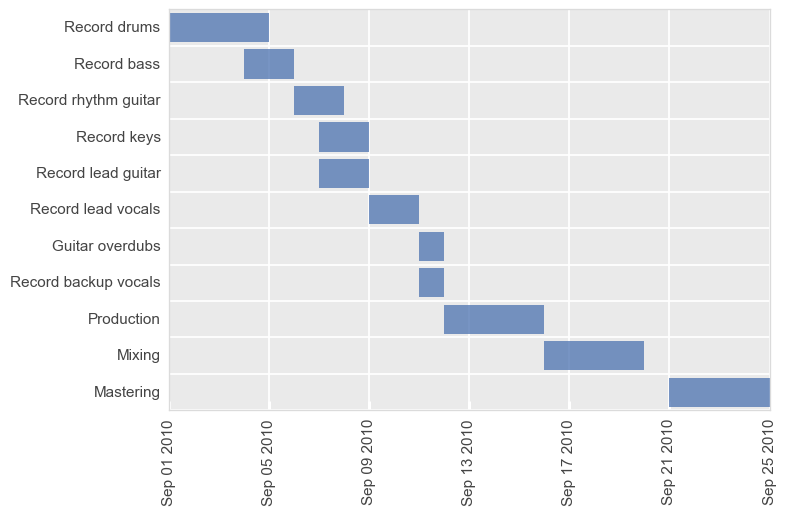

In [4]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', ax_size=[600, 400])

As with other plots, tick label fonts, sizes, and rotations can all be controlled using the correct ``kwarg``.  See <a href="ticks.html">Grids and ticks</a> for more details.

## Grouping

Like all other plots in <b>fivecentplots</b>, Gantt charts can grouped in various ways to provide further insight into the data set.  This includes: 

* `legend`
* `row`
* `col`
* `wrap`

keyword options.  A couple of examples are shown below.

### Legends

Legends can be used to further distinguish various tasks by assignee or other factors.  If the same task has multiple assignees, they will be split into two different bars in the chart.

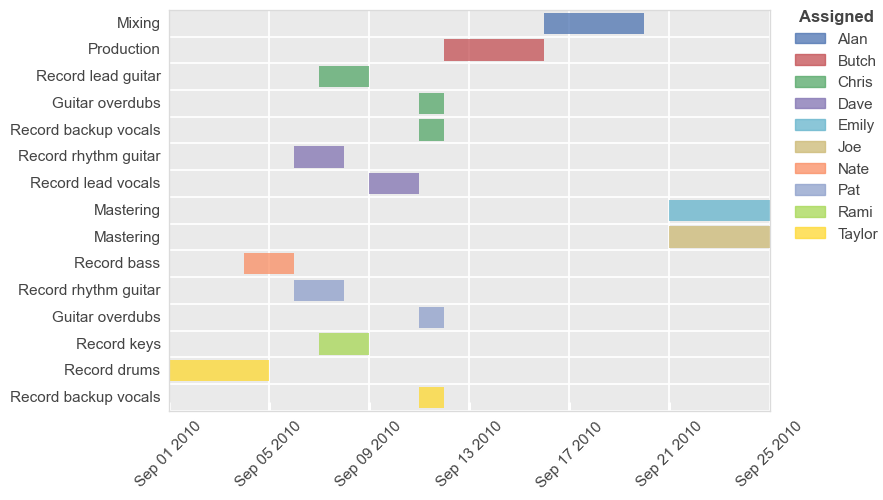

In [5]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', legend='Assigned', ax_size=[600, 400], gantt_tick_labels_x_rotation=45)

When using a legend, we can also sort the y-axis values based on the order in the legend using keyword `order_by_legend=True`:

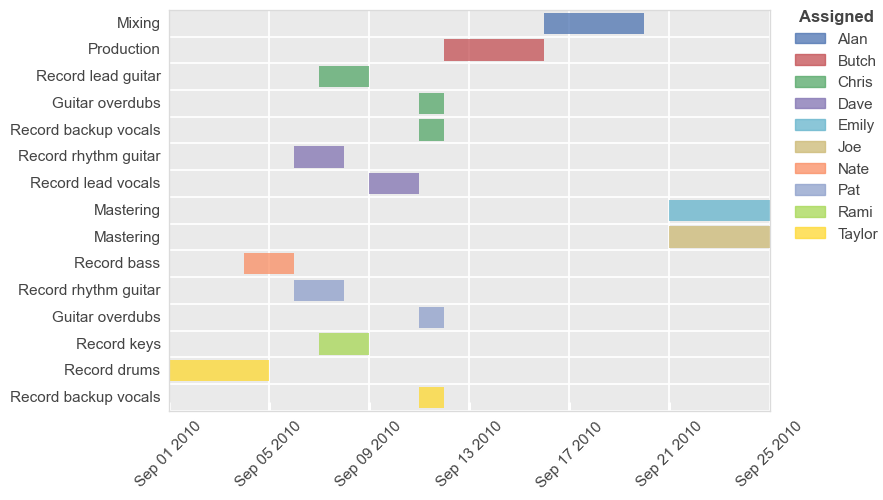

In [6]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', legend='Assigned', ax_size=[600, 400], gantt_tick_labels_x_rotation=45, order_by_legend=True)

### Row/column plot

Row grouping (`share_y` is automatically disabled):

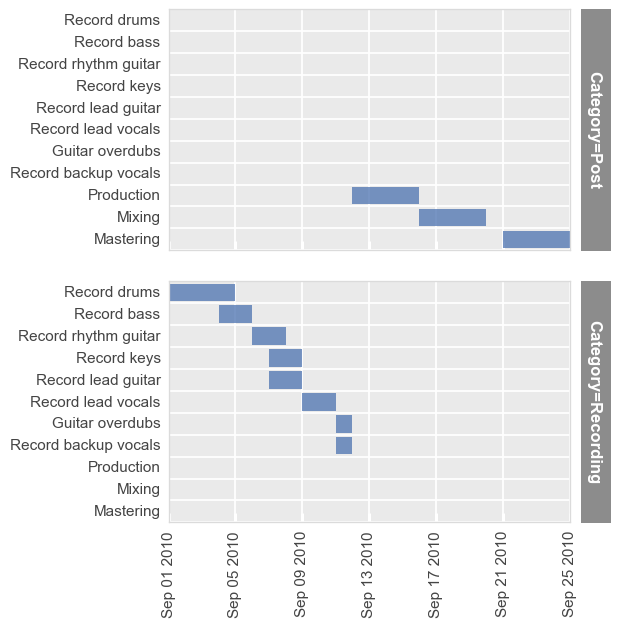

In [7]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', row='Category', ax_size=[400, 240])

Column grouping (`share_y` is automatically disabled):

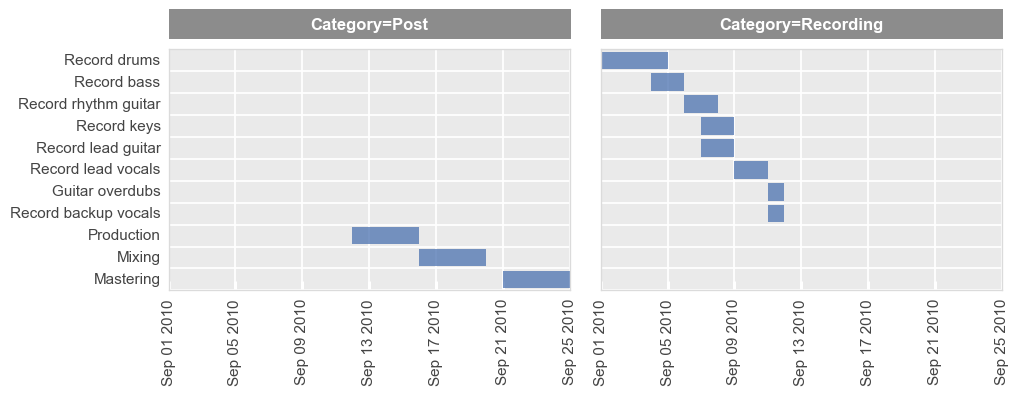

In [8]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', col='Category', ax_size=[400, 240])

### Wrap plot

Notice that `share_y` is enabled for this type of grouping:

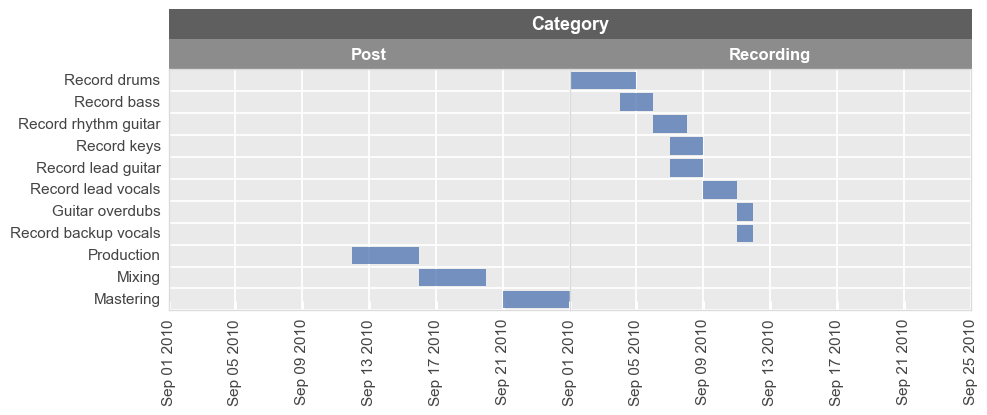

In [9]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', wrap='Category', ax_size=[400, 240])

## Better Gantts

While the basic Gantt chart works for displaying simple task lists, Gantt charts can be more powerful when they graphically show dependencies, group by user workstreams, denote milestones, and provide better date range demarcation.  As of v0.6, **fivecentplots** provides these updated features when using the `matplotlib` engine.

First, load a new data set with a richer set of project details:

In [10]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_gantt_milestone.csv')
df.head()

,Quarter,Priority,Workstream,Description,Owner,Jira Epic,Start date,End date,Duration,Milestone,Dependency
0,2025-Q1,P0,Design,Pixel layout,Gary Garrison,CRP-1013,01-01-2025,NaN,2w,NaN,NaN
1,2025-Q1,P0,Design,Periphery circuits,Andy Anderson,CRP-1013,01-20-2025,03-31-2025,NaN,NaN,Pixel layout
2,2025-Q1,P1,Design,TCAD simulation,Sam Samuelson,CRP-1013,02-22-2025,NaN,10d,NaN,NaN
3,2025-Q1,P2,Design,Initial tape out,Amber Amberly,CRP-1013,02-22-2025,03-15-2025,NaN,NaN,NaN
4,2025-Q2,P0,Design,Finalize tape out,Amber Amberly,CRP-1013,NaN,NaN,1.5m,NaN,Pixel layout; Periphery circuits


.. note:: 
   
   Most keywords used for advanced Gannt chart creation support both a long and short form.  The short-form is ideal for ad-hoc plot creation, but the long-form, which simply prepends the keyword with `gantt_` could be useful to avoid keyword collisions within custom theme files.

   * Short-form example: `workstreams_location`

   * Long-form example: `gantt_workstreams_location`

### Dates

All Gantt charts in **fivecentplots** require a starting date and and ending date.  However, several options are provided for viewing these ranges within the plot:

* Basic: 
    * simple string at each x-tick mark
    * by default, the tick label is rotated 90 degrees
    * date label tick range automatically determined based on the xmin to xmax range
    * `date_location` can be at the top or bottom of the plot ("bottom" by default)

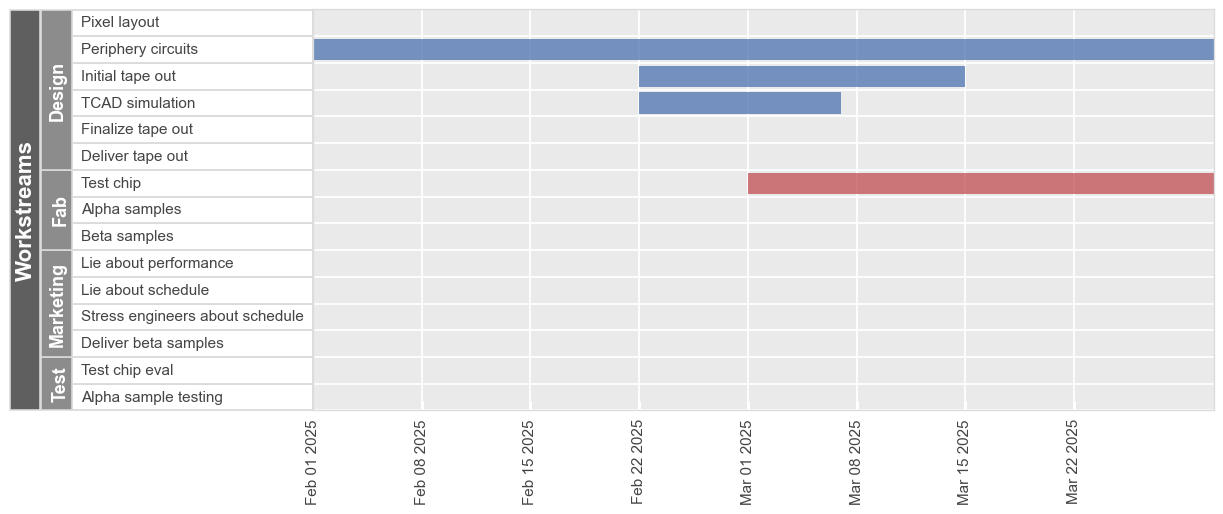

In [11]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          xmin=datetime.datetime(2025, 2, 1), xmax=datetime.datetime(2025, 3, 31),
          workstreams='Workstream', ax_size=[900, 400])

* Date range labels:
    * specified using keyword `date_type` (or `gantt_date_type`)
    * add a series of rectangular labels that span specific date ranges
    * can combine one more more *unique* label periods
    * `date_location` is always on top of the plot
    * options include: 'year', 'quarter', 'month', 'week', 'quarter-year', 'month-year'

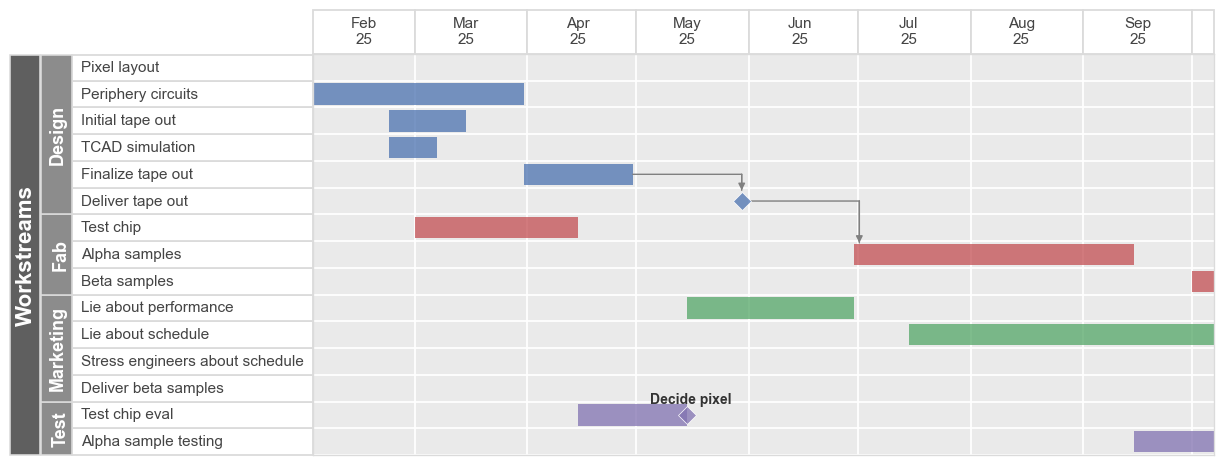

In [12]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          date_type='month-year',
          xmin=datetime.datetime(2025, 2, 1), xmax=datetime.datetime(2025, 10, 7),
          workstreams='Workstream', ax_size=[900, 400])

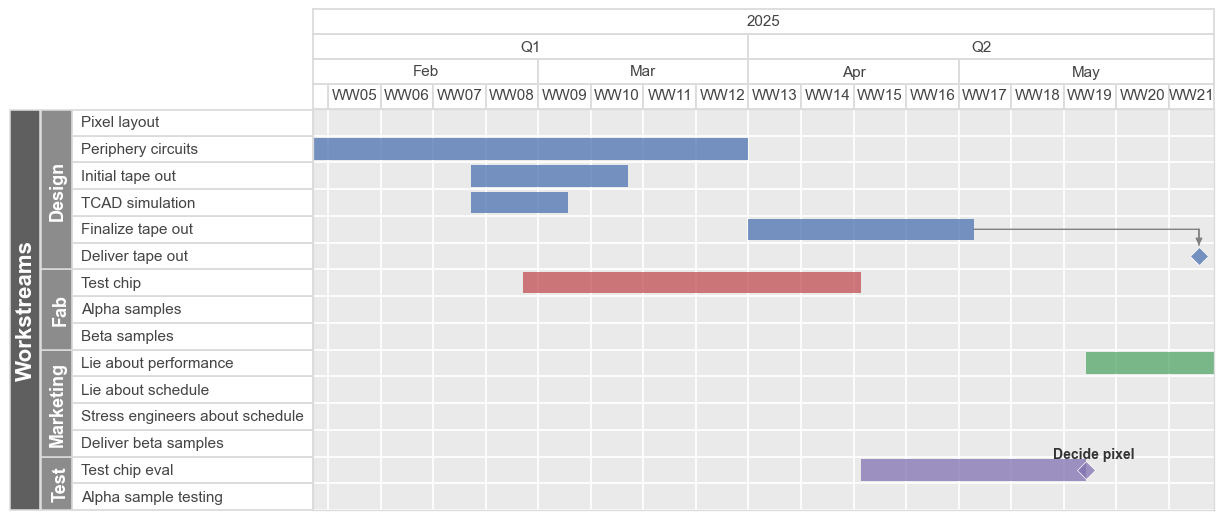

In [13]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          date_type=['year', 'quarter', 'month', 'week'],
          xmin=datetime.datetime(2025, 2, 1),
          xmax=datetime.datetime(2025, 6, 1),
          workstreams='Workstream', ax_size=[900, 400])

### Duration

As mentioned above, all entries in a Gannt chart require a start and end date.  For convenience, **fivecentplots** allows you to specify a start date and *duration* in lieu of an actual end date.  Consider the first entry in our example chart:

In [14]:
df.loc[0:0]

,Quarter,Priority,Workstream,Description,Owner,Jira Epic,Start date,End date,Duration,Milestone,Dependency
0,2025-Q1,P0,Design,Pixel layout,Gary Garrison,CRP-1013,01-01-2025,NaN,2w,NaN,NaN


No specific end date is listed, but the "Duration" column indicates a task time of "2w" or two weeks.  **fivecentplots** computes the actual end date and plots accordingly:

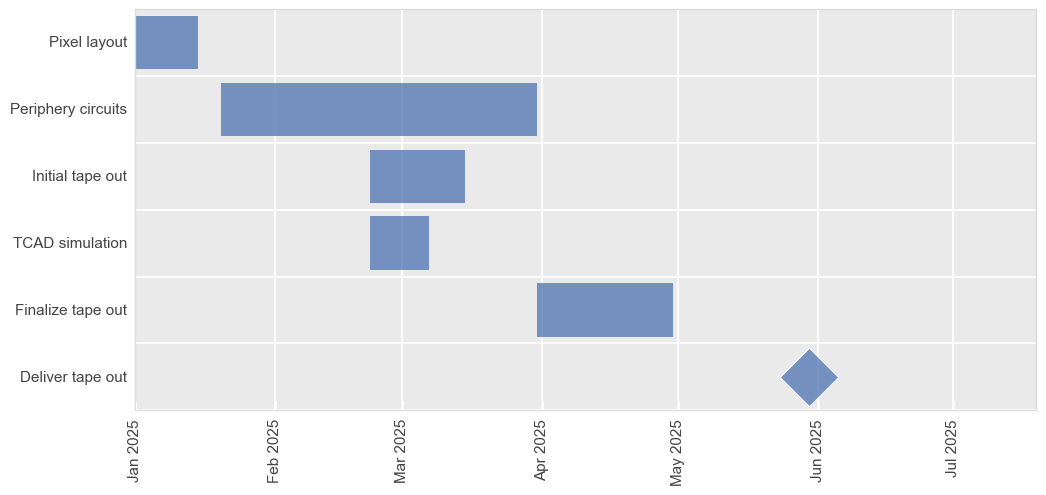

In [15]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          filter='Workstream=="Design"', ax_size=[900, 400])

The following durations are supported:

* `'w'` = weeks
    * can be an integer or a fraction (ex: `'1.5w'`)
    * assumes full weeks of 7 days and does not account for weekends

* `'m'` = months
    * can be an integer or a fraction (ex: `'2.2m'`)
    * assumes a month is 30 days and does not account for weekends 

* `'d'` = days
    * only integers allowed
    * assumes only actual business days (disable with `business_days=False`)
    * assumes no work on US holidays (disable with `us_holidays=False`)



### Workstreams

A "workstream" is a group of related tasks within an overall project.  Workstream values are specified within a column of the DataFrame similar to how `legend` values are specified, meaning each row of data that is part of a given workstream has a common value within a column that is identified using the kwarg `workstreams`.  By default, workstream label values and the workstreams title will appear to the left of the Gantt chart with formatting similar to that of a `wrap` plot.

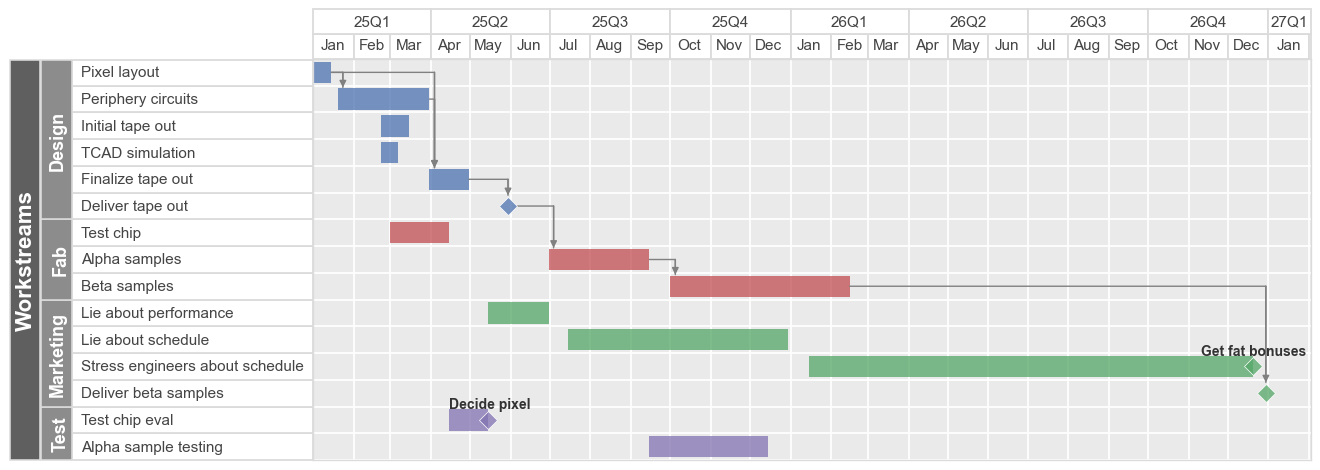

In [16]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', gantt_date_type=['quarter-year', 'month'],
          workstreams='Workstream', ax_size=[900, 400])

Font and color properties of the workstreams labels and titles are accessible using `workstreams_label_xxx` or `workstreams_title_xxx`, respectively.  An additional shortcut is provided, if you want to match the workstreams labels with the bar color; set `match_bar_color=True`

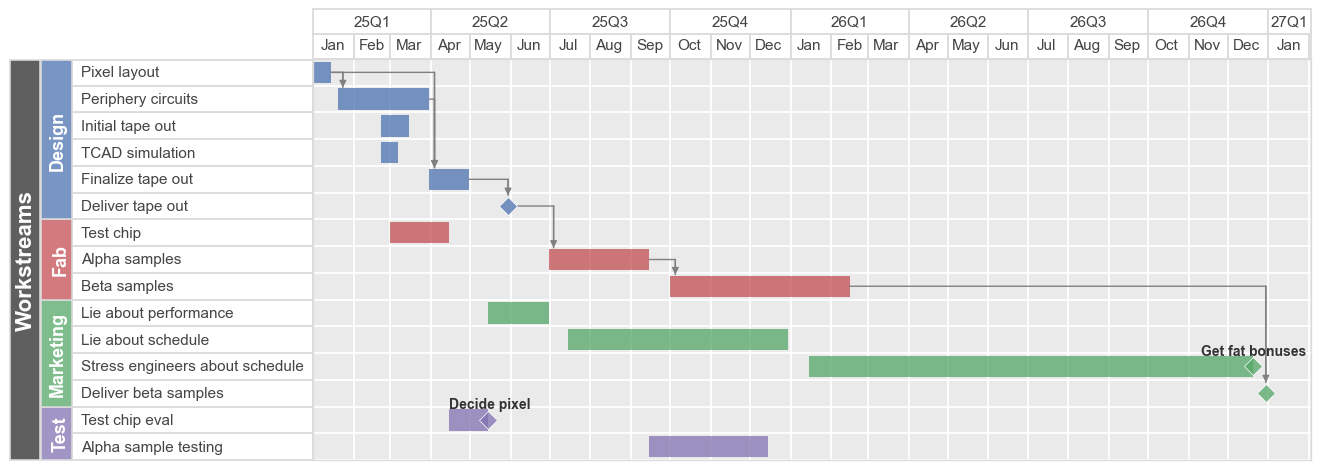

In [17]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', gantt_date_type=['quarter-year', 'month'],
          workstreams='Workstream', ax_size=[900, 400], match_bar_color=True)

Additionally, keyword `workstreams_location` can set the position of the labels on the `left` (see above), `right`, or `inline` (see below).  When using the `inline` location, `workstreams_brackets` which display the full duration of all tasks in the workstream and `workstreams_highlight_row` which colors the workstream title row are automatically enabled.

.. note:: When workstream labels and titles are used in place of y-tick labels, automatic removal of overlapping tick labels is <i>disabled</i>.  If you change font sizes of these elements, you may also need to change the vertical height of your plot to accommodate the increased size as shown below

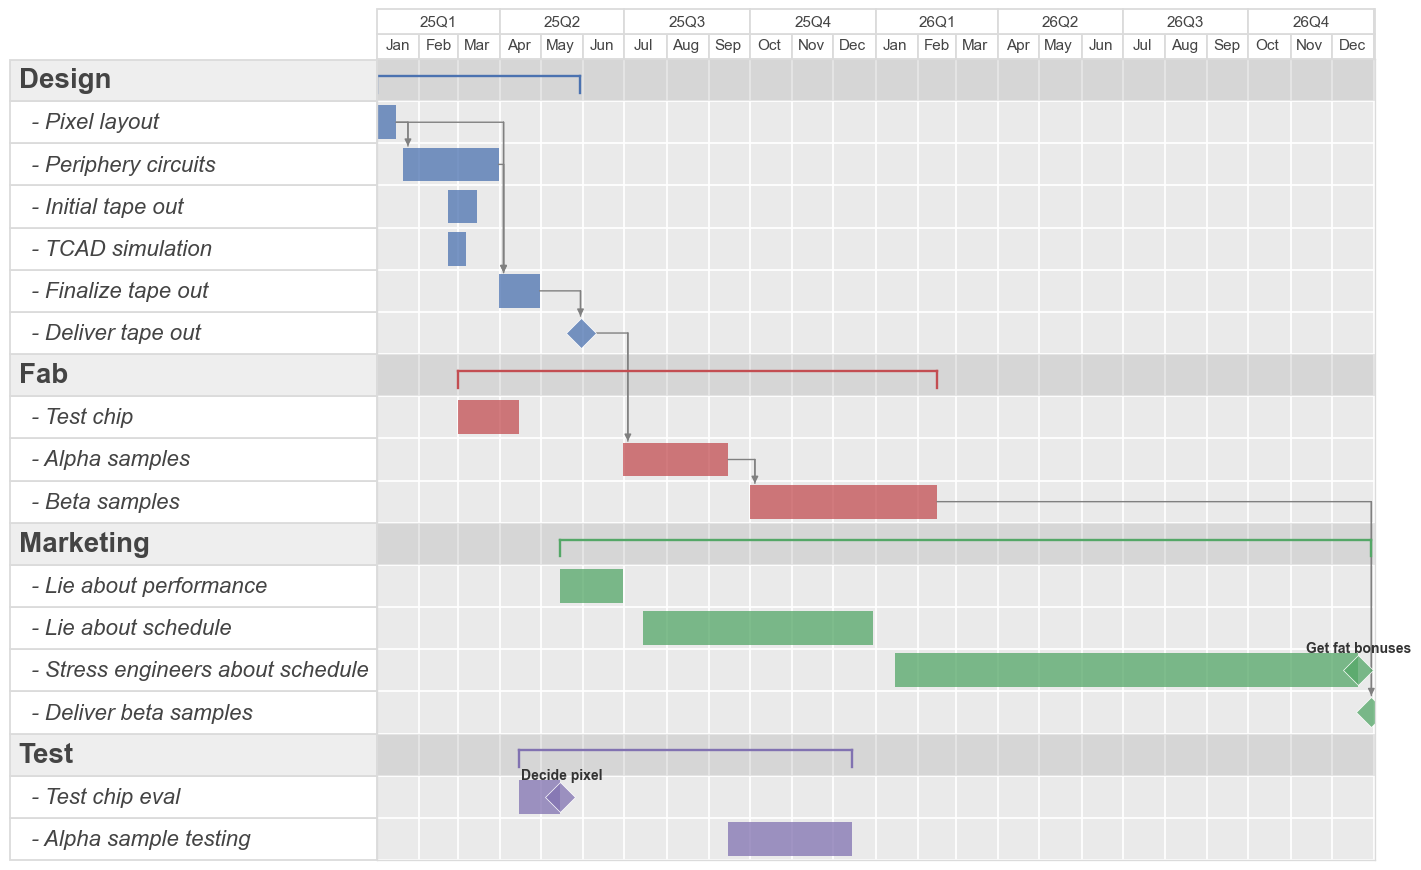

In [18]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', gantt_date_type=['quarter-year', 'month'],
          workstreams='Workstream', workstreams_location='inline', ax_size=[900, 800],
          workstreams_label_font_size=16, workstreams_label_font_style='italic',
          workstreams_title_font_size=20, workstreams_title_font_weight='bold')

### Today

Besides being the greatest day Billy Corgan has ever known, "today" can be shown on the Gantt chart: 

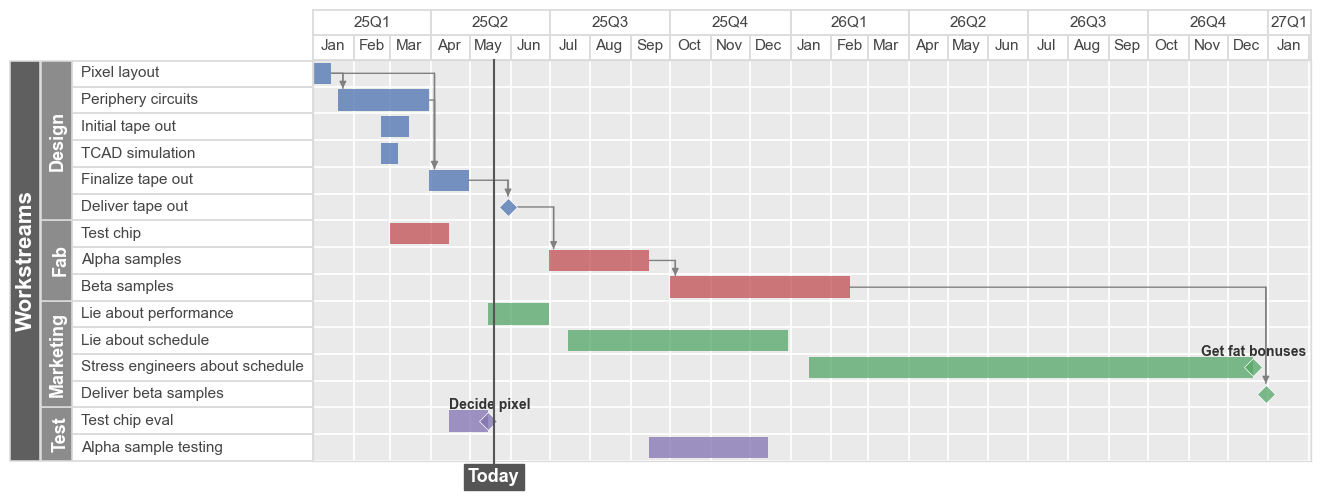

In [19]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', gantt_date_type=['quarter-year', 'month'],
          workstreams='Workstream', ax_size=[900, 400], today=True)

By default, the `today` line and label elements will be placed according to `datetime.datetime.now()`.  This can be customized using keywords beginning with `today_`. 
Lastly, the `today` label will always appear on the opposite side of the dates.

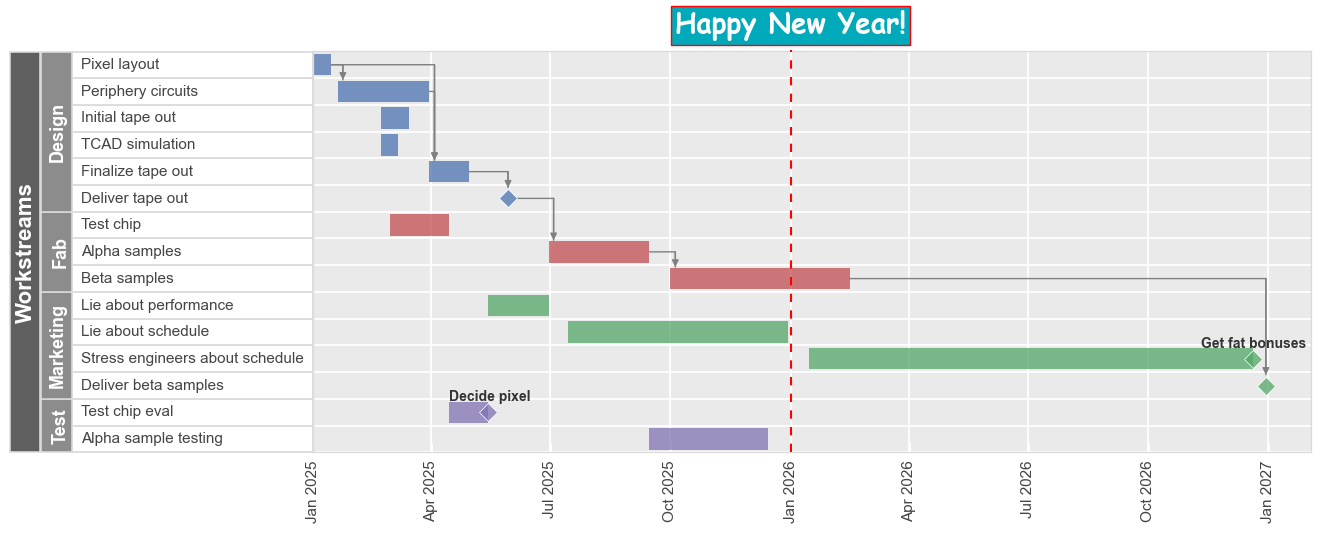

In [20]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          workstreams='Workstream', ax_size=[900, 400],
          today=datetime.datetime(2026, 1, 1), today_style='--', today_color='#FF0000',
          today_fill_color='#00AABB', today_edge_color='#FF0000', today_text='Happy New Year!',
          today_font='Comic Sans MS', today_font_size=20, today_font_weight='bold')

### Bar labels

It is often convenient to display labels at the end of each bar on the Gantt chart which convey additional information about the task at hand.  This can be accomplished by passing one or more column names from the `DataFrame` into keyword `bar_labels`:

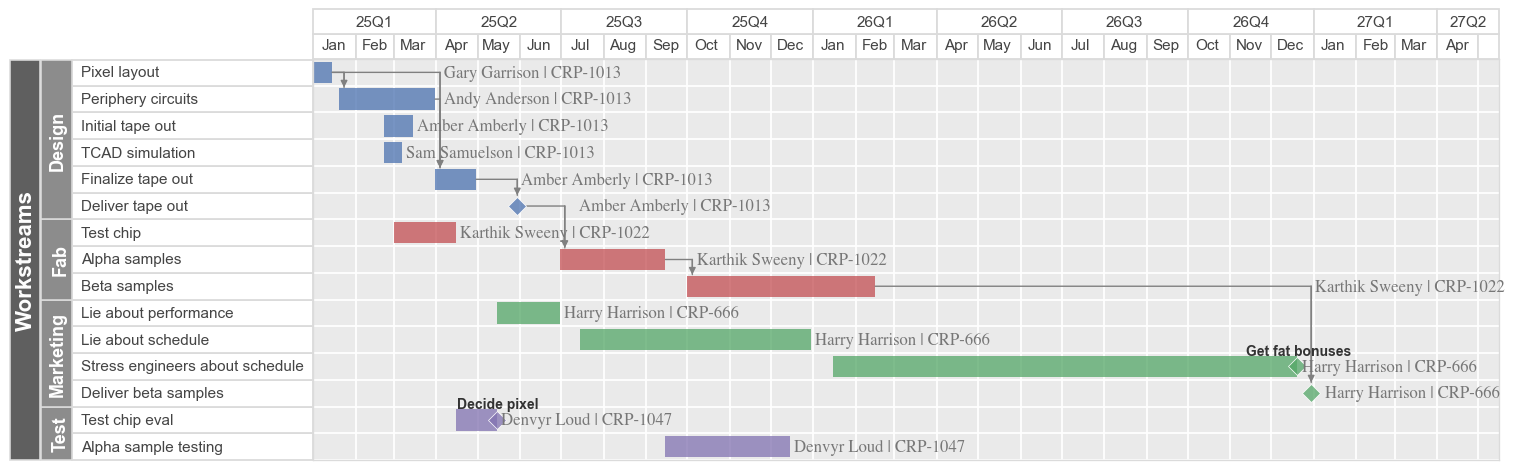

In [21]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          bar_labels=['Owner', 'Jira Epic'],
          gantt_date_type=['quarter-year', 'month'], workstreams='Workstream', ax_size=[900, 400])

.. note:: The Gantt chart width will automatically increase to accomodate the width of the bar labels, unless you have specified a value for `xmin` or `xmax`

### Milestones

A "milestone" is a special point in time with zero duration (i.e., start date = end date) and are rendered on the Gantt chart as diamonds.  Any item in the `DataFrame` with a start date and no end date or duration is treated as a milestone.  If an additional column of milestone labels is provided, an accompanying label is added adjacent to the diamond. For our example, there are 3 milestones (rows, 5, 10, 15), but only 2 have a label (rows 10, 15):

In [22]:
df[['Description', 'Start date', 'End date', 'Duration', 'Milestone']]

,Description,Start date,End date,Duration,Milestone
0,Pixel layout,01-01-2025,NaN,2w,NaN
1,Periphery circuits,01-20-2025,03-31-2025,NaN,NaN
2,TCAD simulation,02-22-2025,NaN,10d,NaN
3,Initial tape out,02-22-2025,03-15-2025,NaN,NaN
4,Finalize tape out,NaN,NaN,1.5m,NaN
5,Deliver tape out,05-30-2025,NaN,NaN,NaN
6,Test chip,03-01-2025,04-15-2025,NaN,NaN
7,Alpha samples,06-30-2025,09-15-2025,NaN,NaN
8,Beta samples,10-01-2025,02-15-2026,NaN,NaN
9,Test chip eval,04-15-2025,05-15-2025,NaN,NaN


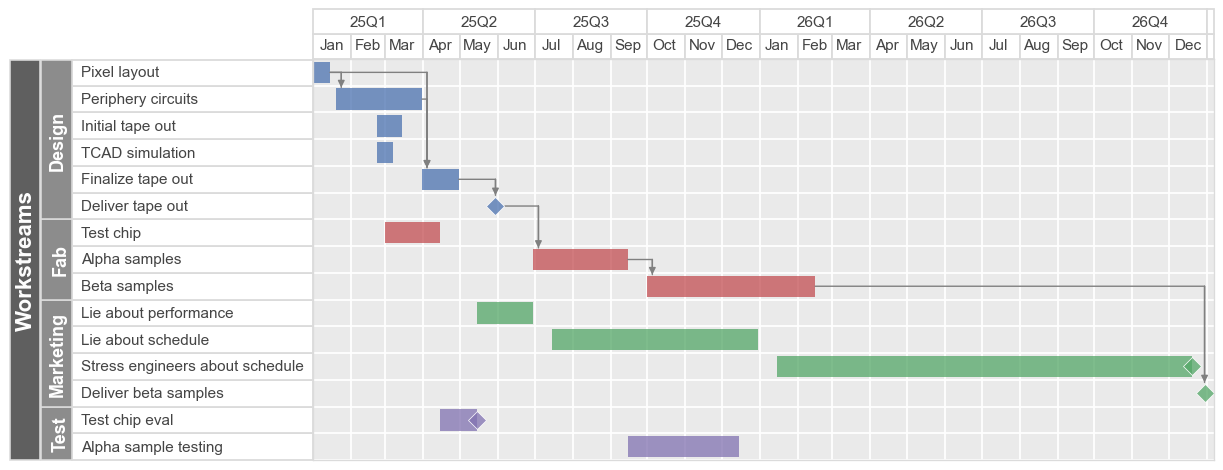

In [23]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', milestones=False,
          gantt_date_type=['quarter-year', 'month'], workstreams='Workstream', ax_size=[900, 400])

### Dependencies

Dependencies between tasks can be visually indicated using arrows between the end of the first task to the start of the dependent task.  This is accomplished by specifying one or more test in a "Dependency" column within the `DataFrame`.  If the dependent task has multiple predecessors, separate them by a semicolon in the proper cell (see row 4 below):

In [24]:
df[['Description', 'Dependency']]

,Description,Dependency
0,Pixel layout,NaN
1,Periphery circuits,Pixel layout
2,TCAD simulation,NaN
3,Initial tape out,NaN
4,Finalize tape out,Pixel layout; Periphery circuits
5,Deliver tape out,Finalize tape out
6,Test chip,NaN
7,Alpha samples,Deliver tape out
8,Beta samples,Alpha samples
9,Test chip eval,NaN


**fivecentplots** automatically checks for a column named "Dependency" but this can be overriden using keyword `dependencies` (or `gantt_dependencies`).  Alternatively, these lines can be disabled by setting this column name to `False`:

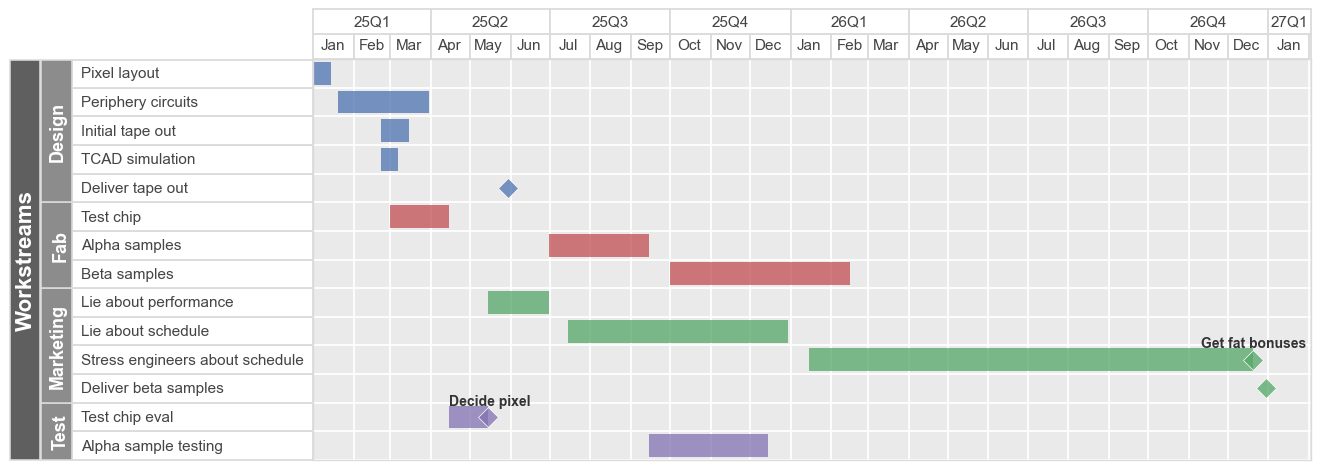

In [25]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', dependencies=False,
          gantt_date_type=['quarter-year', 'month'], workstreams='Workstream', ax_size=[900, 400])

When linking dependent tasks, it is permissible to leave the dependent tasks "Start date" cell empty.  **fivecentplots** will automatically determine this date based on the end date of the predecessor tasks.  In our example chart, "Finalize tape out" depends on both "Pixel layout" and "Periphery circuts".  "Pixel layout" finishes before "Periphery circuits" so in the actual plot we see that the start date of "Finalize tape out" matches the end date of that row:

In [26]:
df.loc[[0, 1, 4], ['Description', 'Start date', 'End date', 'Duration', 'Dependency']]

,Description,Start date,End date,Duration,Dependency
0,Pixel layout,01-01-2025,NaN,2w,NaN
1,Periphery circuits,01-20-2025,03-31-2025,NaN,Pixel layout
4,Finalize tape out,NaN,NaN,1.5m,Pixel layout; Periphery circuits


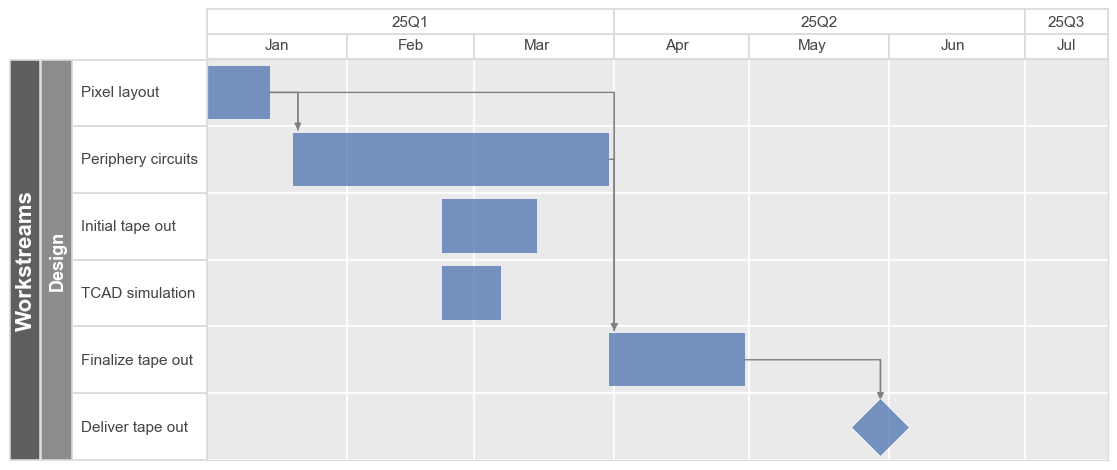

In [27]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          filter='Workstream=="Design"',
          gantt_date_type=['quarter-year', 'month'], workstreams='Workstream', ax_size=[900, 400])

## Styling

Various style options are available for the Gantt bars themselves (note that `gantt_height` is a relative height where a value of 1 means it fills the full height between tick marks):

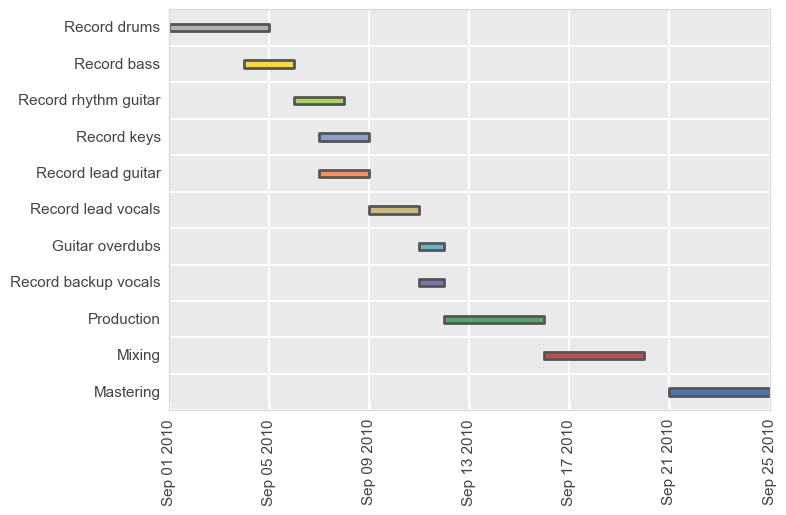

In [30]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', ax_size=[600, 400], color_by='bar',
          gantt_edge_width=2, gantt_edge_color='#555555', gantt_height=0.2,
          gantt_fill_alpha=1)

## Sorting

By default, the sorting order of tasks is "descending" from top to bottom by date.  We can flip that behavior with the keyword `sort='ascending'`:

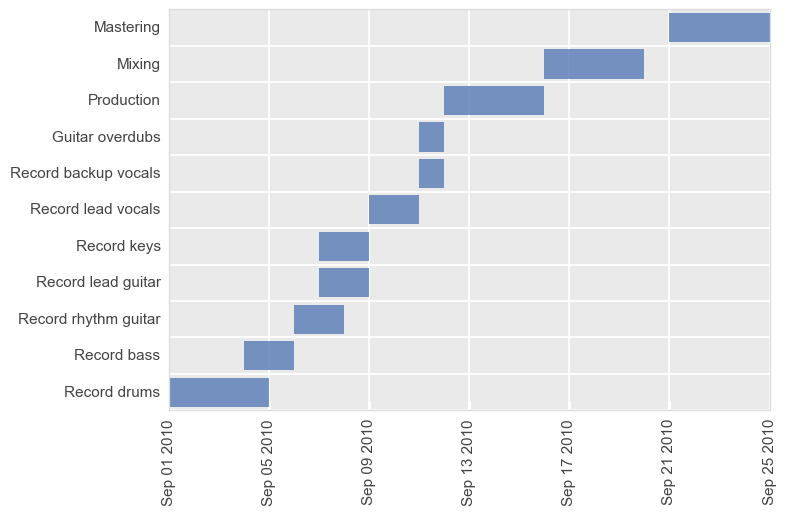

In [29]:
fcp.gantt(df_basic, x=['Start', 'Stop'], y='Task', sort='ascending', ax_size=[600, 400])